Can you fit an exponential function to the number of confirmed, recovered and deaths data for a country, India,
, and plot the data points along with the fitted functions. Note that you have to fit fit three different functions for three time series. Along that it would also be great if you can write s phtno। program to compute doubling rate for India.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

covid = pd.read_csv('covid.csv', index_col=0)
covid.head()

,date,country,confirmed,deaths,recovered
0,02-26-2020,Mainland China,78065.0,2715.0,30053.0
1,02-26-2020,South Korea,1261.0,12.0,22.0
2,02-26-2020,Others,705.0,4.0,10.0
3,02-26-2020,Italy,453.0,12.0,3.0
4,02-26-2020,Japan,189.0,2.0,22.0


In [2]:
covidIndia = covid[covid['country']=='India']
covidIndia.drop('country', axis=1, inplace=True)
covidIndia.set_index('date', inplace=True)
covidIndia.index = pd.to_datetime(covidIndia.index)
covidIndia.sort_index(inplace=True)
covidIndia.head()

,confirmed,deaths,recovered
date,,,
2020-01-30,1.0,NaN,NaN
2020-01-31,1.0,NaN,NaN
2020-02-01,1.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,3.0,0.0,0.0


In [3]:
covidIndia['deltaT'] = covidIndia.index.to_series().diff().astype('timedelta64[D]')
covidIndia.fillna(0, inplace=True)
covidIndia.head()

,confirmed,deaths,recovered,deltaT
date,,,,
2020-01-30,1.0,0.0,0.0,0.0
2020-01-31,1.0,0.0,0.0,1.0
2020-02-01,1.0,0.0,0.0,1.0
2020-02-02,2.0,0.0,0.0,1.0
2020-02-03,3.0,0.0,0.0,1.0


In [4]:
covidIndia['T'] = covidIndia['deltaT'].cumsum()
covidIndia.head()

,confirmed,deaths,recovered,deltaT,T
date,,,,,
2020-01-30,1.0,0.0,0.0,0.0,0.0
2020-01-31,1.0,0.0,0.0,1.0,1.0
2020-02-01,1.0,0.0,0.0,1.0,2.0
2020-02-02,2.0,0.0,0.0,1.0,3.0
2020-02-03,3.0,0.0,0.0,1.0,4.0


In [8]:
x = covidIndia['T'].values
A, B, COV = [], [], []
cases = ['confirmed', 'deaths', 'recovered']
for case in cases:
    # y = Ae^(Bx)
    y = covidIndia[case].values
    param, cov = curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y,  p0=[0, 0])
    A.append(param[0])
    B.append(param[1])
    COV.append(cov)
    X = np.arange(0,len(covidIndia))
    Y = param[0] * np.exp(param[1]*X)
    covidIndia['estimated ' + case] = Y 

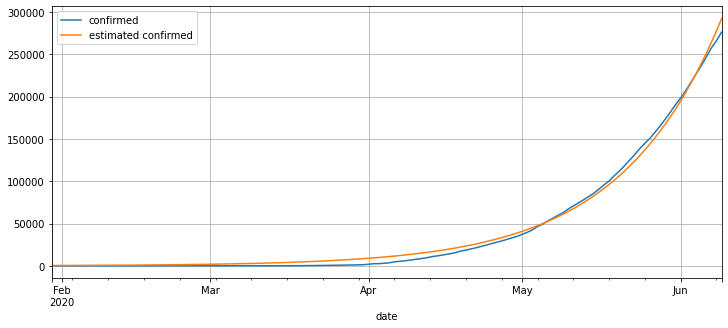

In [13]:
covidIndia[['confirmed', 'estimated confirmed']].plot(figsize=(12,5), grid=True)

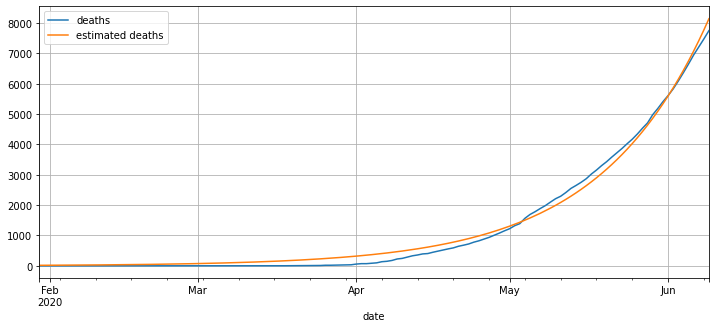

In [14]:
covidIndia[['deaths', 'estimated deaths']].plot(figsize=(12,5), grid=True)

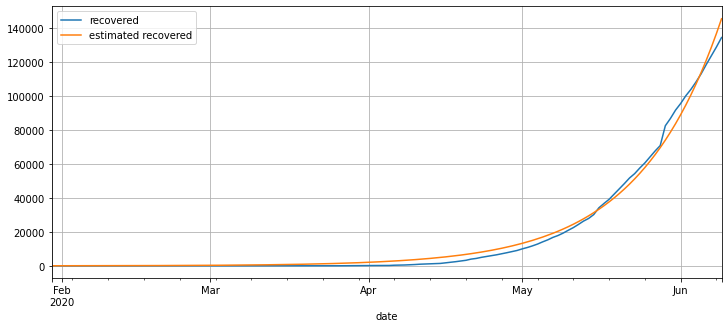

In [15]:
covidIndia[['recovered', 'estimated recovered']].plot(figsize=(12,5), grid=True)

In [22]:
COV[0]

array([[ 5.64962308e+02, -1.17449449e-02],
       [-1.17449449e-02,  2.45784086e-07]])

In [26]:
print('Parameters: (y=A exp^[B x])\n')
for idx, case in enumerate(cases):
    print('For {} cases: A = {}, B = {}\ncov(A,B) = {}\n\n'.format(case, A[idx], B[idx], COV[idx]))

Parameters: (y=A exp^[B x])

For confirmed cases: A = 393.01811934628864, B = 0.050464455248559484
cov(A,B) = [[ 5.64962308e+02 -1.17449449e-02]
 [-1.17449449e-02  2.45784086e-07]]


For deaths cases: A = 17.4711850025547, B = 0.046902457734343525
cov(A,B) = [[ 1.48939274e+00 -7.00055881e-04]
 [-7.00055881e-04  3.31603341e-07]]


For recovered cases: A = 46.60958375826839, B = 0.06143379581406072
cov(A,B) = [[ 2.07748715e+01 -3.59738958e-03]
 [-3.59738958e-03  6.25634737e-07]]




In [16]:
Td = [] #doubling time
print('Doubling Times:')
for idx, case in enumerate(cases):
    Td.append(np.log(2)/B[idx])
    print('For {} cases = {}'.format(case, Td[idx]))

Doubling Times:
For confirmed cases = 13.73535446178687
For deaths cases = 14.778483133782563
For recovered cases = 11.282831727635175
